<a href="https://colab.research.google.com/github/YehezkelShay/introduction-to-python/blob/master/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forests

# Data

We're going to the load the titanic dataset we looked at in lesson 03_Pandas.

In [0]:
from argparse import Namespace
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import urllib
import pandas_profiling


In [0]:
# Arguments
args = Namespace(
    seed=1234,
    data_file="iris.csv",
    train_size=0.75,
    test_size=0.25,
    num_epochs=100,
    max_depth=4,
    min_samples_leaf=5,
    n_estimators=10, # of trees in the forest
)

# Set seed for reproducability
np.random.seed(args.seed)

In [0]:
# Upload data from GitHub to notebook's local drive
url = "https://raw.githubusercontent.com/YehezkelShay/introduction-to-python/master/Data_Sets/iris.csv"
response = urllib.request.urlopen(url)
html = response.read()
with open(args.data_file, 'wb') as f:
    f.write(html)

In [0]:
# Read from CSV to Pandas DataFrame
df = pd.read_csv(args.data_file, header=0)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [0]:
pandas_profiling.ProfileReport(df)


Number of variables,5
Number of observations,150
Total Missing (%),0.0%
Total size in memory,7.0 KiB
Average record size in memory,48.0 B
Numeric,3
Categorical,1
Boolean,0
Date,0
Text (Unique),0
Rejected,1


# Scikit-learn implementation

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
# Preprocessing
def preprocess(df):
  
    # Drop rows with NaN values
    df = df.dropna()

    # Drop text based features (we'll learn how to use them in later lessons)
    #features_to_drop = ["name", "cabin", "ticket"]
    #df = df.drop(features_to_drop, axis=1)

    # pclass, sex, and embarked are categorical features
    # We need to convert strings to floats for decision trees instead of
    # using dummy variables.
    #df['sex'] = df['sex'].map( {'female': 0, 'male': 1} ).astype(int)
    #df["embarked"] = df['embarked'].dropna().map( {'S':0, 'C':1, 'Q':2} ).astype(int)

    return df

In [0]:
# Preprocess the dataset
df = preprocess(df)
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [0]:
# Split the data
mask = np.random.rand(len(df)) < args.train_size
train_df = df[mask]
test_df = df[~mask]
print ("Train size: {0}, test size: {1}".format(len(train_df), len(test_df)))

Train size: 113, test size: 37


In [0]:
# Separate X and y
X_train = train_df.drop(["variety"], axis=1)
y_train = train_df["variety"]
X_test = test_df.drop(["variety"], axis=1)
y_test = test_df["variety"]

**Note**: Play around with the max_depth and min_samples values below to see the change in performance and decision tree.
How do we know when to stop splitting? In cases where we have a large number of features, our decision tree will be very large. If we keep splitting, we could have overfitting. There are a few techniques to tackle this:

*  Set a minimum # of training samples on each leaf.
*  Set a maximum depth (length of longest path from root to leaf).
*  Prune the tree by removing features that add little to no information gain.

In [0]:
# Initialize the model
dtree = DecisionTreeClassifier(criterion="entropy", random_state=args.seed, 
                               max_depth=args.max_depth, 
                               min_samples_leaf=args.min_samples_leaf)

In [0]:
# Training
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [0]:
# Predictions
pred_train = dtree.predict(X_train)
pred_test = dtree.predict(X_test)

print(pred_train)
print(pred_test)

['Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa'
 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Setosa' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Virginica' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Virginica' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Virginica' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor' 'Versicolor'
 'Versicolor' 'Versicolor' 'Virginica' 'Virginica' 'Virginica'
 'Versicolor' 'Virginica' 'Virginica' 'Virginica' 'Virginica' 'Virginica'
 'Virginica' 'Virginica' 'Virginica' 'Vi

# Evaluation

In [0]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [0]:
# Accuracy
train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
print ("train acc: {0:.2f}, test acc: {1:.2f}".format(train_acc, test_acc))

train acc: 0.96, test acc: 1.00


In [0]:
# Calculate other evaluation metrics 
precision, recall, F1, _ = precision_recall_fscore_support(y_test, pred_test, average=None)
print ("precision: {0}. recall: {1}, F1: {2}".format(precision, recall, F1))

precision: [1. 1. 1.]. recall: [1. 1. 1.], F1: [1. 1. 1.]


# Interpretability

In [0]:
# Install necessary packages
!apt-get install graphviz
!pip install pydotplus

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.


In [0]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


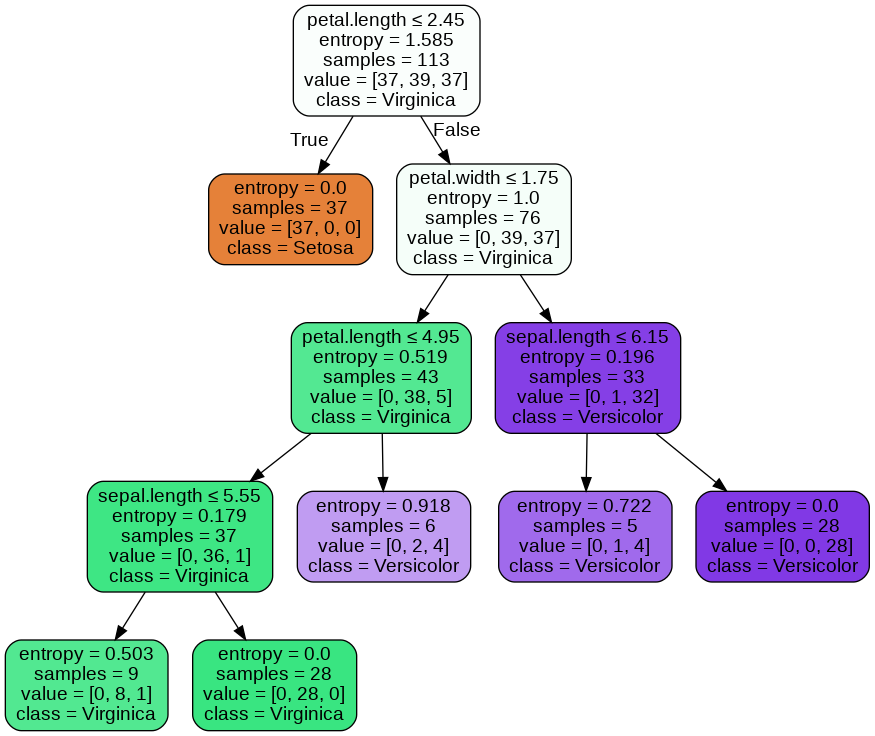

In [0]:
# Interpretability
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, 
                feature_names=list(train_df.drop(['variety'], axis=1)), 
                class_names = ['Setosa', 'Virginica','Versicolor'],
                rounded = True, filled= True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=500, height=300)

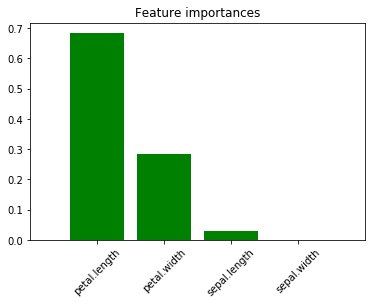

petal.length - 0.685
petal.width - 0.285
sepal.length - 0.030
sepal.width - 0.000


In [0]:
# Feature importances
features = list(X_test.columns)
importances = dtree.feature_importances_
indices = np.argsort(importances)[::-1]
num_features = len(importances)

# Plot the feature importances of the tree
plt.figure()
plt.title("Feature importances")
plt.bar(range(num_features), importances[indices], color="g", align="center")
plt.xticks(range(num_features), [features[i] for i in indices], rotation='45')
plt.xlim([-1, num_features])
plt.show()

# Print values
for i in indices:
    print ("{0} - {1:.3f}".format(features[i], importances[i]))

# Random forests

A group, or ensemble, of decision trees together create a random forest. The idea is that a group of different trees will yield more accurate predictions compared to a single decision tree. But how can we have different trees if they're all made using the same data and optimized on a metric like IG? The trick here is that the different decision trees in the random forest are made of different subsets of data and even different thresholds for features. 

<img src="https://raw.githubusercontent.com/GokuMohandas/practicalAI/master/images/forest.png" width=600>

# Scikit-learn implementation

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
# Initialize Random forest
forest = RandomForestClassifier(
    n_estimators=args.n_estimators, criterion="entropy", 
    max_depth=args.max_depth, min_samples_leaf=args.min_samples_leaf)

In [0]:
# Train
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# Predictions
pred_train = forest.predict(X_train)
pred_test = forest.predict(X_test)

In [0]:
# Accuracy
train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
print ("train acc: {0:.2f}, test acc: {1:.2f}".format(train_acc, test_acc))


train acc: 0.94, test acc: 1.00


# Interpretability

It's very easy to inspect random forests and derive feature importance values. 

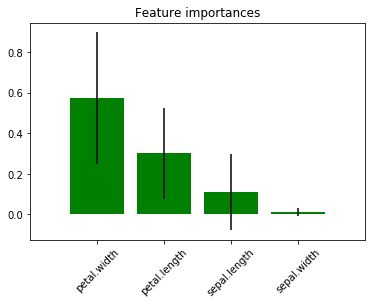

petal.width - 0.574
petal.length - 0.303
sepal.length - 0.111
sepal.width - 0.012


In [0]:
# Feature importances
features = list(X_test.columns)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
num_features = len(importances)

# Plot the feature importances of the tree
plt.figure()
plt.title("Feature importances")
plt.bar(range(num_features), importances[indices], yerr=std[indices], 
        color="g", align="center")
plt.xticks(range(num_features), [features[i] for i in indices], rotation='45')
plt.xlim([-1, num_features])
plt.show()

# Print values
for i in indices:
    print ("{0} - {1:.3f}".format(features[i], importances[i]))

In [0]:
[features[i] for i in indices]

['petal.width', 'petal.length', 'sepal.length', 'sepal.width']

# Grid Search

In our random forest, we have many different hyperparameters (criterion, max_depth, etc.) and many of the models we will see in future lessons will have even more parameters. How will we know what values to pick? We have to tune the values based on the performance they yield on the validation set. Scikit learn offers functions to do exhaustive grid search so that we can tune our hyperparameters. 

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
# Create the parameter grid 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 50],
    'max_features': [len(features)],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [4, 8],
    'n_estimators': [5, 10, 50] # of trees
}

In [0]:
# Initialize random forest
forest = RandomForestClassifier()

In [0]:
# Instantiate grid search
grid_search = GridSearchCV(estimator=forest, param_grid=param_grid, cv=3, 
                           n_jobs=-1, verbose=1)

In [0]:
# Fit grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 162 out of 162 | elapsed:    4.8s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [0]:
# See the best combination of parameters
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 10}

In [0]:
# Train using best parameters
best_forest = grid_search.best_estimator_
best_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
# Predictions
pred_train = best_forest.predict(X_train)
pred_test = best_forest.predict(X_test)

In [0]:
# Accuracy
train_acc = accuracy_score(y_train, pred_train)
test_acc = accuracy_score(y_test, pred_test)
print ("train acc: {0:.2f}, test acc: {1:.2f}".format(train_acc, test_acc))
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred_test)

train acc: 0.96, test acc: 1.00


array([[13,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 13]])

# TODO

- regression example
- gini vs. entropy